In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import netCDF4 as nc
import seaborn as sns
import matplotlib.colors as mcolors
import glob
import os

from salishsea_tools import viz_tools

import ONC_patrols as onc


%matplotlib inline

In [2]:
sns.set_color_codes()

In [3]:
grid_B=nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')
mesh_mask=nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/mesh_mask201702.nc')
badQC=[0,3,4,9]

In [4]:
file = "/ocean/nsoontie/MEOPAR/ONC/Patrols/Victoria_Patrol9_CTD_20150220T182104Z_20151001T195734Z-Corrected.csv"

In [5]:
data= onc.load_patrol_csv(file)
data = onc.exclude_bad(data,['Practical Salinity Corrected QC Flag  '], badQC)
data = onc.divide_into_casts(data)

# LOAD_PATROL_CSV WORKS!!!

<class 'numpy.ndarray'>


ValueError: object arrays are not supported

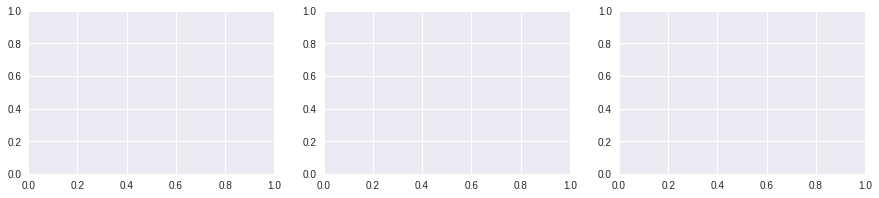

In [6]:
names={'obs': 'Practical Salinity Corrected (psu)',
       'model': 'vosaline'}
onc.compare_patrol_model_obs(data, names, grid_B, mesh_mask, var_lims=[28,34])

In [7]:
import scipy.interpolate as interp
def interpolate_depth(variable, depth_array, depth_new):
    """ interpolates a variable depth profile field to desire depth.
    Ideally the variable is already masked but this method masks invalid data.
    """
    # mask
    var_mask = np.ma.masked_invalid(variable)
    d_mask = np.ma.masked_invalid(depth_array)
    f = interp.interp1d(d_mask[~d_mask.mask], 
                        var_mask[~var_mask.mask],
                        bounds_error=False 
                        , fill_value='extrapolate' #I added this. it doesn't seem to harm anything
                                                   #It extrapolates if the requested points are outside the domain
                       )
    var_new = f(depth_new)

    return var_new

In [8]:
a = np.arange(5, dtype=np.float)   #making a little array
a[2] = np.PINF
masked = np.ma.masked_invalid(a)
interpolate_depth(masked[~masked.mask],
                 masked[~masked.mask],
                 np.linspace(5,10,5))

array([  5.  ,   6.25,   7.5 ,   8.75,  10.  ])

In [9]:
interpolate_depth([],[],np.linspace(2,5,4)) #using empty arrays

ValueError: total size of new array must be unchanged